<a href="https://colab.research.google.com/github/MpRonald/dataScience/blob/main/Naive_Bayes_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naives Bayes
Script example about Naive Bayes algorithm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
# Convertendo o dataset em um dataframe com Pandas
breast_cancer = load_breast_cancer()
dataset = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
dataset['target'] = breast_cancer.target

In [9]:
dataset.head()

mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]

In [4]:
dataset.target.unique()

array([0, 1])

In [5]:
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
dataset.describe().T

count        mean  ...          75%         max
mean radius              569.0   14.127292  ...    15.780000    28.11000
mean texture             569.0   19.289649  ...    21.800000    39.28000
mean perimeter           569.0   91.969033  ...   104.100000   188.50000
mean area                569.0  654.889104  ...   782.700000  2501.00000
mean smoothness          569.0    0.096360  ...     0.105300     0.16340
mean compactness         569.0    0.104341  ...     0.130400     0.34540
mean concavity           569.0    0.088799  ...     0.130700     0.42680
mean concave points      569.0    0.048919  ...     0.074000     0.20120
mean symmetry            569.0    0.181162  ...     0.195700     0.30400
mean fractal dimension   569.0    0.062798  ...     0.066120     0.09744
radius error             569.0    0.405172  ...     0.478900     2.87300
texture error            569.0    1.216853  ...     1.474000     4.88500
perimeter error          569.0    2.866059  ...     3.357000    21.98000
area error               569.0   40.337079  ...    45.190000   542.20000
smoothness error         569.0    0.007041  ...     0.008146     0.03113
compactness error        569.0    0.025478  ...     0.032450     0.13540
concavity error          569.0    0.031894  ...     0.042050     0.39600
concave points error     569.0    0.011796  ...     0.014710     0.05279
symmetry error           569.0    0.020542  ...     0.023480     0.07895
fractal dimension error  569.0    0.003795  ...     0.004558     0.02984
worst radius             569.0   16.269190  ...    18.790000    36.04000
worst texture            569.0   25.677223  ...    29.720000    49.54000
worst perimeter          569.0  107.261213  ...   125.400000   251.20000
worst area               569.0  880.583128  ...  1084.000000  4254.00000
worst smoothness         569.0    0.132369  ...     0.146000     0.22260
worst compactness        569.0    0.254265  ...     0.339100     1.05800
worst concavity          569.0    0.272188  ...     0.382900     1.25200
worst concave points     569.0    0.114606  ...     0.161400     0.29100
worst symmetry           569.0    0.290076  ...     0.317900     0.66380
worst fractal dimension  569.0    0.083946  ...     0.092080     0.20750
target                   569.0    0.627417  ...     1.000000     1.00000

[31 rows x 8 columns]

In [ ]:
!pip install dataprep

DataPrep Report
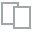
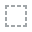
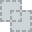
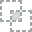
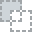
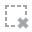
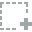
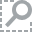
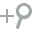
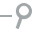
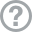
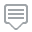
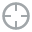
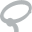
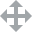
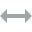
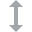
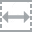
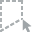
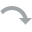
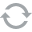
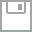
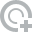
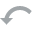
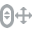
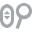
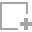
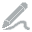
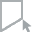
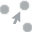
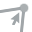
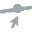

In [10]:
from dataprep.eda import create_report
create_report(dataset)

In [12]:
dataset.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [15]:
dataset.columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target']

In [16]:
dataset.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')

In [18]:
M = dataset[dataset.target == 1]
B = dataset[dataset.target == 0]

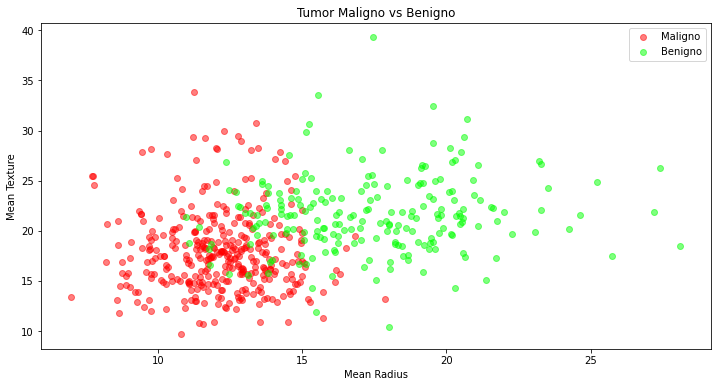

In [24]:
plt.figure(figsize=(12,6))
plt.title("Tumor Maligno vs Benigno")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.scatter(M.mean_radius, M.mean_texture, color = "red", label = "Maligno", alpha=0.5)
plt.scatter(B.mean_radius, B.mean_texture, color = "lime", label = "Benigno", alpha=0.5)
plt.legend()
plt.show()

In [29]:
X = dataset.drop(['target'], axis=1)
y = dataset['target'].values

In [30]:
X

mean_radius  mean_texture  ...  worst_symmetry  worst_fractal_dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]

In [31]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Padronizando as variáveis de entrada

In [34]:
scaler = StandardScaler().fit(X)
scaler_X = scaler.transform(X)

In [35]:
dataset_norm = pd.DataFrame(scaler_X)
dataset_norm.describe().T

count          mean      std  ...       50%       75%        max
0   569.0 -3.162867e-15  1.00088  ... -0.215082  0.469393   3.971288
1   569.0 -6.530609e-15  1.00088  ... -0.104636  0.584176   4.651889
2   569.0 -7.078891e-16  1.00088  ... -0.235980  0.499677   3.976130
3   569.0 -8.799835e-16  1.00088  ... -0.295187  0.363507   5.250529
4   569.0  6.132177e-15  1.00088  ... -0.034891  0.636199   4.770911
5   569.0 -1.120369e-15  1.00088  ... -0.221940  0.493857   4.568425
6   569.0 -4.421380e-16  1.00088  ... -0.342240  0.526062   4.243589
7   569.0  9.732500e-16  1.00088  ... -0.397721  0.646935   3.927930
8   569.0 -1.971670e-15  1.00088  ... -0.071627  0.530779   4.484751
9   569.0 -1.453631e-15  1.00088  ... -0.178279  0.470983   4.910919
10  569.0 -9.076415e-16  1.00088  ... -0.292245  0.266100   8.906909
11  569.0 -8.853492e-16  1.00088  ... -0.197498  0.466552   6.655279
12  569.0  1.773674e-15  1.00088  ... -0.286652  0.243031   9.461986
13  569.0 -8.291551e-16  1.00088  ... -0.347783  0.106773  11.041842
14  569.0 -7.541809e-16  1.00088  ... -0.220335  0.368355   8.029999
15  569.0 -3.921877e-16  1.00088  ... -0.281020  0.389654   6.143482
16  569.0  7.917900e-16  1.00088  ... -0.199065  0.336752  12.072680
17  569.0 -2.739461e-16  1.00088  ... -0.140496  0.472657   6.649601
18  569.0 -3.108234e-16  1.00088  ... -0.219430  0.355692   7.071917
19  569.0 -3.366766e-16  1.00088  ... -0.229940  0.288642   9.851593
20  569.0 -2.333224e-15  1.00088  ... -0.269040  0.522016   4.094189
21  569.0  1.763674e-15  1.00088  ... -0.043516  0.658341   3.885905
22  569.0 -1.198026e-15  1.00088  ... -0.285980  0.540279   4.287337
23  569.0  5.049661e-16  1.00088  ... -0.341181  0.357589   5.930172
24  569.0 -5.213170e-15  1.00088  ... -0.046843  0.597545   3.955374
25  569.0 -2.174788e-15  1.00088  ... -0.269501  0.539669   5.112877
26  569.0  6.856456e-16  1.00088  ... -0.218232  0.531141   4.700669
27  569.0 -1.412656e-16  1.00088  ... -0.223469  0.712510   2.685877
28  569.0 -2.289567e-15  1.00088  ... -0.127409  0.450138   6.046041
29  569.0  2.575171e-15  1.00088  ... -0.216444  0.450762   6.846856

[30 rows x 8 columns]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaler_X, y, test_size=0.3, random_state=42)

In [39]:
# treinando com a GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [42]:
# treinando com a Multinomial
clf_B = BernoulliNB()
clf_B.fit(X_train, y_train)

BernoulliNB()

In [46]:
clf_nb_score = clf_nb.score(X_test, y_test)*100
clf_B_score = clf_B.score(X_test, y_test)*100
print(f"Naive Bayes Gaussian score: {round(clf_nb_score, 3)}%" )
print(f"Naive Bayes Multinomial score: {round(clf_B_score, 3)}%" )

Naive Bayes Gaussian score: 93.567%
Naive Bayes Multinomial score: 97.661%
